# 1 Optimization I: Linear Regression 

## 1.1 Single Variable Regression

Analyze the data set "single_variate_optimization.csv" and understand the relationship between the target variable Y and the predictor X

(1) Calculate the variance, standard deviation of $X$ and $Y$

(2) Calculate the covariance, correlation coefficient of $X$ and $Y$

(3) Using the LinearRegression from sklearn package in python and build a linear regression model $Y ∼ X$, what are $\beta_0$ and $\beta_1$?

(4) Can you replicate $\beta_1$ using the calculation from (1) and (2)? How about $\beta_0$?

In [22]:
# (0) loading the data set

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


df = pd.read_csv('single_variate_optimization.csv')
df.rename(columns = {'# X':'X',' Y':'Y'}, inplace = True) 


In [23]:
# (1) Calculate the variance, standard deviation of X and Y

var_x = df.X.var()
var_y = df.Y.var()

sd_x = np.sqrt(var_x)
sd_y = np.sqrt(var_y)



In [24]:
# (2) Calculate the covariance, correlation coefficient of X and Y

cov_xy = np.mean((df.X-df.X.mean())*(df.Y-df.Y.mean()))

r = cov_xy/(sd_x*sd_y) # Correlation coefficient
r

0.9765230658169038

The correlation coefficient is incredibly close to one, therefore the relation between $X$ and $Y$ is almost linear. The points are all around the regreesion line being very close to it. Notice that

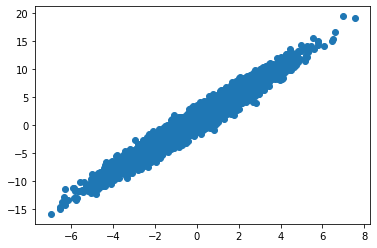

In [25]:
plt.scatter(df.X.values,df.Y.values)
plt.show()

In [26]:
# Using the LinearRegression from sklearn package in python and build a 
# linear regression model $Y ∼ X$, what are $\beta_0$ and $\beta_1$?

from sklearn import linear_model

x = df.X.values.reshape((-1,1))
y = df.Y.values

reg = linear_model.LinearRegression()
reg.fit(x,y)
print([reg.coef_, reg.intercept_])


[array([2.30875957]), 0.9929982700491149]


In [27]:
# (4) Can you replicate β1 using the calculation from (1) and (2)? 
# How about $\beta_0$? Yes, I need the mean of X and Y.

Recall that

\begin{align*}
\beta_1 = r_{xy}\frac{\sigma_Y}{\sigma_X} \\
\beta_0 = \overline{y}-\beta_1 \overline{x}
\end{align*}

If we calculate these values 'by hand':


In [28]:
beta1 = r*sd_y/sd_x
beta1

2.308297819461404

In [29]:
beta0 = df.Y.mean()-beta1*df.X.mean() # Here I need to use the mean
beta0

0.9929858677005061

In [30]:
# Error 

beta1-reg.coef_

array([-0.00046175])

In [31]:
beta0-reg.intercept_

-1.2402348608775426e-05

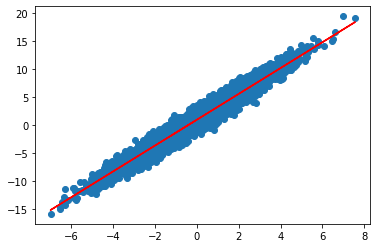

In [32]:
# Plotting the line and a scatter plot

import matplotlib.pyplot as plt

y_pred = reg.predict(x)
plt.plot(x,y_pred, color = 'red')
plt.scatter(x,y)
plt.show()


## 1.2 Multivariate Regression

Analyze the data set "multi_variate_optimization.csv" and understand the relationship between the tar- get variable Y and the predictor $X$s

(1) Using the LinearRegression from sklearn package in python and build a linear regression model $Y ∼ X$, what are the $\beta$'s?


(2) Caculate the $\beta$'s using the algorithm that we derived in class. hint: $\hat{\beta} = (X^TX)^{-1}X^TY$. Make sure you replicate $\beta_0$.

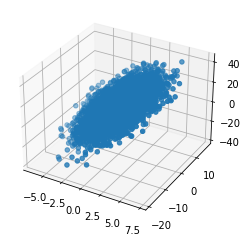

In [33]:
# (0) Loading the dataset

df2 = pd.read_csv('multi_variate_optimization.csv')
df2.rename(columns = {'# X1':'X1',' X2':'X2',' X3':'X3',' Y':'Y'}, inplace = True)

# This lives in a 4 dimensional space, we can only plot a triple

ax = plt.axes(projection='3d')
ax.scatter3D(df2.X1.values,df2.X2.values,df2.Y.values)

In [34]:
# (1) Using the LinearRegression from sklearn package in python and build
# a linear regression model Y~X, what are the beta's?

X = df2[['X1','X2','X3']].values
df2['ones'] = np.ones(np.size(X[:,0]))
X_t = df2[['ones','X1','X2','X3']].values
Y = df2['Y'].values

reg = linear_model.LinearRegression()
reg.fit(X,Y)
print([reg.coef_, reg.intercept_])


[array([3.90481328, 1.19976052, 4.57225211]), 5.004780479291684]


In [35]:
# (2) Caculate the $\beta$'s using the algorithm that we derived in class. 
# hint: $\hat{\beta} = (X^TX)^{-1}X^TY$. Make sure you replicate $\beta_0$.

np.matmul(np.linalg.inv(np.matmul(np.transpose(X_t),X_t)),np.matmul(np.transpose(X_t),Y))

# X_t has a column of ones at the first colum, the result below
# is beta_0, beta_1,beta_2,beta_3.

array([5.00478048, 3.90481328, 1.19976052, 4.57225211])

# Optimization II: Logistic Regression

Analyze the data set "logistic_regression_optimization.csv" and understand the relationship between the target variable Y and the predictor Xs


(1) Using the LogisticRegression from sklearn package in python and build a logistic regression model $Y \sim X$, what are the $\beta$'s? Hint: make sure that you set the regularization parameter to be large e.g. C = 1e4. See the code below for your reference

from sklearn.linear_model import LogisticRegression logisticRegr = LogisticRegression(C=1e4)

(2) Calculate $\beta$'s using Newton-Raphson method. Hint: initialize $\beta$'s with some random values e.g. 0.1. Update $\beta$'s using the formula below until $\beta$ converges, i.e. stop updating when the minimum value of $\Delta \beta$ is less than $\delta = 1e−15$. How are your $\beta$'s compare to what you got in question (1)?

(3) How many iteration is needed before $\beta$ converges?

(4) Change the convergence condition by setting $\delta$ to be 0.5 and 0.1. What are the $\beta$'s, for the two $\delta$'s that you choose? How many iterations are needed before they converge?


In [37]:
# Loading the data set

data = pd.read_csv('logistic_regression_optimization.csv')
data.rename(columns = {'# X1':'X1',' X2':'X2',' X3':'X3',' Y':'Y'}, inplace = True) 

X = data[['X1','X2','X3']].values
Y = data.Y.values.reshape(5000,1)

# λ is the regularization parameter. It controls the 
# the relation between two goals: fitting the training data well 
# vs keeping the params small to avoid overfitting.

# In this case C = 1/lambda.

# Solving part 1 using sciklearn

from sklearn.linear_model import LogisticRegression 

lr = LogisticRegression(C = 1e4)
lr.fit(X,Y.reshape(Y.size))

print([lr.coef_,lr.intercept_])

# Testing the previos result - comparing probabilities with the real Y.

#ones = np.ones(5000)
#l1 = logisticRegr.coef_
#l2 = logisticRegr.intercept_
#X = np.column_stack([ones,X])
#bt = np.column_stack([l1,l2])
#
# p = 1/(1+np.exp(-np.matmul(X,bt.reshape(-1,1)))) # probabilities at each iteration
# for i in range(0,len(p)):
#    print(np.around(p)[i],Y[i]) 


[array([[3.8338663 , 1.19918226, 4.52602262]]), array([-4.92798701])]


In [48]:
# solving part 2 using 'Newton-Raphson algorithm'

X = data[['X1','X2','X3']].values
Y = data.Y.values.reshape(5000,1)

ones = np.ones(5000)
X = np.column_stack([ones,X]) # We a 'one column' -> considering beta_0


beta = np.array([0.1,0.1,0.1,0.1]).reshape(-1,1) # initial beta - transpose - reshape(-1,1)
Deltabeta = np.array([0.1,0.1,0.1,0.1]).reshape(-1,1) # The initial Deltabeta should be bigger than your while-condition

i = 0
while np.max(np.abs(Deltabeta))>1e-15:
       i += 1
       p = 1/(1+np.exp(-np.matmul(X,beta))) # probabilities at each iteration
       W = np.diag(np.multiply(p,(1-p))[:,0]) # matrices in the decomposition
       XtY = np.matmul(X.T,(Y-p))
       XtWX = np.matmul(np.matmul(X.T,W),X)
       Deltabeta = np.matmul(np.linalg.inv(XtWX),XtY)
       beta = beta + Deltabeta
beta.T

array([[-4.92801398,  3.8338874 ,  1.19918903,  4.52605093]])

The values are the same for both methods. There is an important remark here. When modelling with intercept we have to add a 'one' column to the matrix X. If we don't do this, the results will be different.


In [49]:
# (3) How many iteration is needed before $\beta$ converges?

print("The number of iterations needed before beta converges are", i)



The number of iterations needed before beta converges are 12


In [56]:
# (4) Change the convergence condition by setting $\delta$ to be 0.5 and 0.1. 
# What are the $\beta$'s, for the two $\delta$'s that you choose? 

# NOTE: In this case if we want to have any iteration we should 
# fix the initial values in a different way.
# IF WE USE THE SAME INITIAL VALUES THERE ARE NO ITERATIONS - This has no sense we are lossing precision. 

# delta = 0.5 case

beta = np.array([0.1,0.1,0.1,0.1]).reshape(-1,1) # initial beta - transpose - reshape(-1,1)
Deltabeta = np.array([0.6,0.6,0.6,0.6]).reshape(-1,1) # The initial Deltabeta should be bigger than your while-condition

i = 0
while np.max(np.abs(Deltabeta))>0.5:
       i += 1
       p = 1/(1+np.exp(-np.matmul(X,beta))) # probabilities at each iteration
       W = np.diag(np.multiply(p,(1-p))[:,0]) # matrices in the decomposition
       XtY = np.matmul(X.T,(Y-p))
       XtWX = np.matmul(np.matmul(X.T,W),X)
       Deltabeta = np.matmul(np.linalg.inv(XtWX),XtY)
       beta = beta + Deltabeta
        
# beta's in this case

print("The beta's are:", beta.T,"and the number of iterations is ",i)

The beta's are: [[-4.91292481  3.82207439  1.19545155  4.51211851]] and the number of iterations is  7


In [57]:
# Question 4 continuation

# delta = 0.1 case

# NOTE: In this case if we want to have any iteration we should 
# fix the initial values in a different way.
# IF WE USE THE SAME INITIAL VALUES THERE ARE NO ITERATIONS

beta = np.array([0.1,0.1,0.1,0.1]).reshape(-1,1) # initial beta - transpose - reshape(-1,1)
Deltabeta = np.array([0.11,0.11,0.11,0.11]).reshape(-1,1) # The initial Deltabeta should be bigger than your while-condition

j = 0
while np.max(np.abs(Deltabeta))>0.1:
       j += 1
       p = 1/(1+np.exp(-np.matmul(X,beta))) # probabilities at each iteration
       W = np.diag(np.multiply(p,(1-p))[:,0]) # matrices in the decomposition
       XtY = np.matmul(X.T,(Y-p))
       XtWX = np.matmul(np.matmul(X.T,W),X)
       Deltabeta = np.matmul(np.linalg.inv(XtWX),XtY)
       beta = beta + Deltabeta
        

# beta's in this case

print("The beta's are: ", beta.T,"and the number of iterations is ",j)

The beta's are:  [[-4.92794562  3.83383378  1.19917203  4.52598767]] and the number of iterations is  8


__How many iterations are needed before they converge?__

Zero iterations if we don't change the initial values - in both cases.
If we change the initial values, that's printed in the previous boxes.